[링크 텍스트](https://)# [뉴스 기사 분류하기]

## 1. 팀이름 : [이거 만들면 나랑 사귀는거다?]

## 2. 팀원 정보(팀내 역할 기입)
  - 팀내 맡은 역할 및 개발 파트에서 맡은 역할 구체적으로 기입 (개발은 모든 팀원이 참여해야 합니다.)
  - 팀장(학번 이름) : [30108박찬웅]
  - 팀원1(학번 이름) : [30111송주빈]
  - 팀원2(학번 이름) : [30119정유환]


## 3. 해결하려는 문제 정의 : [입력]
  - 문제의 종류 : 예) 다중분류
  - 동기 : 수업시간때 이중분류를 공부해 봤고 프로젝트에선 좀 더 나아가 두가지 보다 더 많이 분류를 해보고싶어서 다양한 단어와 어휘가 담긴 뉴스기사를 분류 해보기로 했다. 

#### 생각해 볼 질문
- 입력 데이터는 무엇인가요? 독일 통신사 로이터에서 공개한 짧은 뉴스 기사와 토픽의 집합인 로이터 데이터셋 /8,982- 훈련데이터 셋, 2,246개의 테스트 샘플(케라스)
- 어떤 것을 예측하려고 하나요? 뉴스기사 
- 가용한 훈련 데이터가 있나요? 케글 데이터 셋 
- 당면한 문제가 어떤 종류인가요? 뉴스기사를 분류 하는 것 
- 주어진 입력으로 출력을 예측할 수 있나요? 네
- 가용한 데이터에 입력과 출력 사이의 관계를 학습하는 데 충분한 정보가 있나요?
데이터 양은 충분하다 ( 너무 많아서 10000개로 정해놓고 했다)

## 4. 데이터 수집 방법 : [입력]
  - 출처 : [입력]
  - 참고 사이트
    - 공공데이터포털 www.data.go.kr 
    - 서울 열린데이터광장 https://data.seoul.go.kr/
    - 캐글 www.kagle.com
    - 구글 트렌드 https://trends.google.com/trends/?geo=KR
    - 네이버 데이터랩 https://datalab.naver.com/

In [ ]:
from keras.datasets import reuters #케라스에서 데이터 불러오기 

(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000) #학습용 데이터(train)와 테스터 데이터로(test) 분리 

In [ ]:
len(train_data) #훈련 샘플 8982개 샘플 

8982

In [ ]:
len(test_data) # 2246개의 테스트 샘플 

2246

In [ ]:
train_data[10] # 각 샘플은 정수 리스트이다 (단어는 인덱스)

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index() # reuters(데이터) 기사에 대한 index를 받아옴 
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) # dict활용해서 key 값이랑 value 값을 바꾼다 
# 0, 1, 2는 '패딩', '문서 시작', '사전에 없음'을 위한 인덱스이므로 3을 뺍니다
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 반복물을 활용하여 단어 출력하여

In [ ]:
decoded_newswire# 결과 값 확인하기 

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [ ]:
train_labels[15]  #9번 째 값 확인하기 

8

## 5. 선택한 성공 지표(평가 지표) 목록 : [입력]
  - 예) 정확도
  - 선택한 이유 : [예측 값과 실제 값이 얼마나 동일한지 알기 위해서]

#### 성공 지표를 선택할 때 고려할 것
  - 어떤 것을 제어하려면 관측할 수 있어야 한다.
  - 성공하기 위해서는 성공이 무엇인지를 정의해야 한다.
  - 성공 지표는 고수준의 목표(해결하고자 하는 문제)와 직접적으로 연결되어 있어야 한다.
  - 군집 같은 비지도 학습에는 측정 지표가 없지만 군집 결과에 대한 의의를 찾아야 한다.

## 6. 평가 방법 선택 : [교차검증]

#### 예)
- 홀드아웃 검증 세트 분리 : 데이터가 풍부할 때 사용한다.
- K-겹 교차 검증 : 샘플 수가 너무 적을 때 사용한다.
- 반복 K-겹 교차 검증 : 데이터가 적고 매우 정확한 모델 평가가 필요할 때 사용한다.

## 7. 데이터 전처리
  - 결손 값 처리
  - 인코딩
  - 정규화/스케일링
  - 차원축소

In [ ]:
# 데이터 불러오기
import numpy as np

# 데이터 전처리
from typing import Sequence # typing 모듈로 타입 표시하기 -> 파이썬 내장 자료 구조에 대한 타임을 명시해야 할 때 사용 
from keras.utils.np_utils import to_categorical # 원핫 인코딩을 할 수 있는 케라스의 내장 함수이다 



#원핫 인코딩 과정 
def vectorzie_sequences(sequences, dimension=10000): # 데이터 10000개로 제한 
  
  results = np.zeros((len(sequences),dimension)) # np.zeros가 0으로 바꿈 
  for i, sequences in enumerate(sequences): # 
      results[i,sequences] = 1. # 반복문을 돌면서 해당되는 인덱스 값만 1로 바꾸고 나머지는 0으로 채움 
  return results

x_train = vectorzie_sequences(train_data) # 훈련데이터 백터 변환 -> 학습하기 좋으라고 
x_test = vectorzie_sequences(test_data) # 테스트 데이터 백터 변환


#레이블 원 핫 인코딩 
one_hot_train_labels =  to_categorical(train_labels) #학습 시키려고 
one_hot_test_labels =  to_categorical(test_labels)


## 8. 네트워크(모델) 설계
- 네트워크 구조 : Sequential 구조
- 층 개수 : [3층]
- 층 종류(모두 기입) : [relu, softmax]
- 은닉 유닛 개수/필터 개수 : [유닛 개수 46,64개 / 은닉층 1개 ]
- 활성화 함수(모두 기입) : [relu, softmax]
- 옵티마이저 : [(경사하강법)rmsprop]
- 손실함수 : [categorical_crossentropy]

In [ ]:
#모델 설계

from keras import models # 모델을 케라스에서 불러옴
from keras import layers # 모델층을 케라스에서 불러옴 (케라스 라이브러리에서)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,))) # 층 3개를 만들고 64(8*8) 크기의 사이즈를 만듦 
model.add(layers.Dense(64, activation='relu'))#활성화 함수 중 tanh를 사용해서 층을 쌓음 (시그모이드 대체로 사용 가능 )
model.add(layers.Dense(46, activation='softmax'))# 다중 분류이기 때문에 마지막층은 대부분 'softmax'로 한다 
 

model.compile(optimizer='rmsprop', # 모델 컴파일 하기 
              loss='categorical_crossentropy', #손실함수 계산 할 때 사용하는 카테고리크로스엔트로피 -> 확률 분포사이의 
              metrics=['accuracy']) #예측 값과 실제 값이 얼마나 같은지 예측하고싶다  -> 정확도 사용 

## 9. 학습
  - 학습된 모델을 사용하는 경우 학습된 모델의 출처 및 해당 모델을 선택한 이유 및 해당 모델의 특징을 함께 서술
  - 모델 규제 및 하이퍼파라미터 튜닝 과정 포함

In [ ]:
#모델 학습 및 튜닝
x_val = x_train[:1000] # 0~999번까지 인덱스 호출
partial_x_train = x_train[1000:] # 학습이 잘 되었는지 검증데이터 확인 인덱싱 해줌 

y_val = one_hot_train_labels[:1000] #  0~999번까지 인덱스 호출
partial_y_train = one_hot_train_labels[1000:] # 학습이 잘 되었는지 검증데이터 확인 인덱싱 해줌

In [ ]:
history = model.fit(partial_x_train, # 학습시키기 위해 데이터 넣어줌 
                    partial_y_train,
                    epochs=20, # 20번 반복 
                    batch_size=1024, # 베치 사이즈는 512로 설정 
                    validation_data=(x_val, y_val)) #검증데이터 검증 방법 


Epoch 1/20
8/8 [==============================] - 2s 238ms/step - loss: 0.2393 - accuracy: 0.9468 - val_loss: 0.9005 - val_accuracy: 0.8210
Epoch 2/20
8/8 [==============================] - 1s 100ms/step - loss: 0.2121 - accuracy: 0.9486 - val_loss: 0.9098 - val_accuracy: 0.8170
Epoch 3/20
8/8 [==============================] - 1s 102ms/step - loss: 0.1956 - accuracy: 0.9510 - val_loss: 0.9628 - val_accuracy: 0.8010
Epoch 4/20
8/8 [==============================] - 1s 102ms/step - loss: 0.1784 - accuracy: 0.9526 - val_loss: 0.9772 - val_accuracy: 0.7940
Epoch 5/20
8/8 [==============================] - 1s 103ms/step - loss: 0.1662 - accuracy: 0.9533 - val_loss: 0.9673 - val_accuracy: 0.8100
Epoch 6/20
8/8 [==============================] - 1s 99ms/step - loss: 0.1579 - accuracy: 0.9557 - val_loss: 0.9610 - val_accuracy: 0.8110
Epoch 7/20
8/8 [==============================] - 1s 101ms/step - loss: 0.1465 - accuracy: 0.9554 - val_loss: 1.0243 - val_accuracy: 0.7960
Epoch 8/20
8/8 [=====

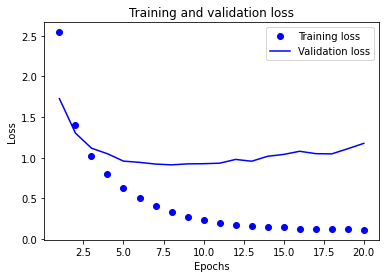

In [ ]:
0.
import matplotlib.pyplot as plt # 그래프를 그리기 위한 함수 호출 
loss = history.history['loss'] # history안에 배열로 저장된 값중 loss 값을 찾음 
val_loss = history.history['val_loss'] # history안에 배열로 저장된 값중 val_loss 값을 찾음

epochs = range(1, len(loss) + 1) # epochs값 설정 배열 이기 때문에 +1 

#그래프 기본 설정 
plt.plot(epochs, loss, 'bo', label='Training loss')  
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

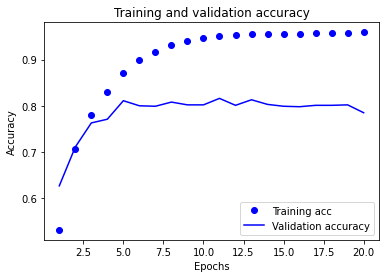

In [ ]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy'] #정확도 값 받아오기 
val_accuracy = history.history['val_accuracy'] # 검증 정확도 값 받아오기 

#그래프 그리기 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train, 
          partial_y_train,
          epochs=9, # 20은 과적합이 일어난다 
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 70ms/step - loss: 2.6323 - accuracy: 0.4896 - val_loss: 1.7181 - val_accuracy: 0.6430
Epoch 2/9
16/16 [==============================] - 1s 58ms/step - loss: 1.4365 - accuracy: 0.7053 - val_loss: 1.3118 - val_accuracy: 0.6970
Epoch 3/9
16/16 [==============================] - 1s 57ms/step - loss: 1.0710 - accuracy: 0.7628 - val_loss: 1.1411 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 1s 58ms/step - loss: 0.8358 - accuracy: 0.8170 - val_loss: 1.0561 - val_accuracy: 0.7680
Epoch 5/9
16/16 [==============================] - 1s 58ms/step - loss: 0.6655 - accuracy: 0.8567 - val_loss: 0.9649 - val_accuracy: 0.7880
Epoch 6/9
16/16 [==============================] - 1s 56ms/step - loss: 0.5351 - accuracy: 0.8890 - val_loss: 0.9147 - val_accuracy: 0.8110
Epoch 7/9
16/16 [==============================] - 1s 57ms/step - loss: 0.4285 - accuracy: 0.9116 - val_loss: 0.8943 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [ ]:
#모델 결과 
results

[1.001916766166687, 0.7876224517822266]

## 11. 느낀 점
  - 박찬웅(30108) : [인공지능 수업시간에는 뭔가 능동적으로 내가 직접 하는게 아닌 따라하는 느낌이여서 숙지가 잘 안 되는 부분도 있었는데, 이번 프로젝트를 통해 수동적으로 따라만 하는게 아닌 능동적으로 직접 친구들과 정보를 공유하면서 공부를 했기때문에 기억에 더 잘 남아 좋았다.]
  - 송주빈(30111) : [수업시간에 배운 내용을 복습할 수 있어서 도움이 되었고, 이해가 되지 않는 부분은 책을 찾아가며 공부할 수 있어서 좋았다. 그동안 이론적으로만 알았던 개념들을 실제로 구현해 볼 수 있어서 좋았다 또 팀원 친구들과 협력해서 프로젝트를 끝낼 수 있어서 뿌듯하다 ]
  - 정유환(30119) : [배운 내용을 바탕으로 친구들과 함께 직접 인공지능을 통해 개발해보니 즐거웠다. 친구들에게 도움을 받아서 어려움을 해결해 나갈 수 있던 것같다. 자료를 조사하며 방대한 뉴스기사를 분류하는 작업은 꽤나 오래걸리고 고된 일이였는데 이처럼 AI를 사용해 간단하게 분류해보니 신기했다. 이번 기회로 인공지능 개발에 더욱 관심을 가지고 다음번에는 더욱 어렵고 복잡한 인공지능 개발을 해보고싶다.]
 
## 12. 참고 문헌
  - 데이터 수집 사이트 : [https://github.com/gilbutITbook/006975]
  - 구글 검색 링크 : [https://github.com/gilbutITbook/006975/blob/master/3.5-classifying-newswires.ipynb]
  - 책 : [케라스 창시자에게 배우는 딥러닝]
  - 기타 : [수업시간 ppt, 수업시간에 했던 예제들 ]

케라스 창시자에게 배우는 딥러닝 